<a href="https://colab.research.google.com/github/ZakiLazuardi987/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.	Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2.	Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.**

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### **3.	Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.**

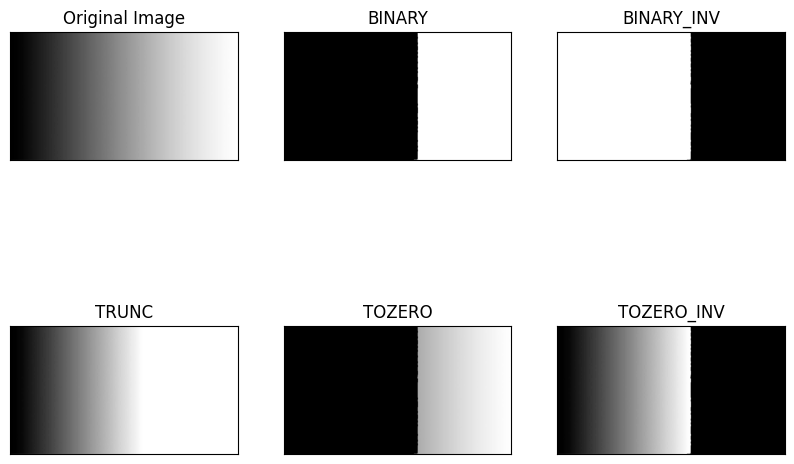

In [6]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/gradient.jpg', 0)

# Set the threshold value
thresh = 170

# Membuat fungsi manual thresholding
def manual_threshold(image, thresh, max_value, method):
    # Membuat array kosong untuk hasil threshold
    result = np.zeros_like(image)

    if method == 'binary':
        # Jika piksel lebih dari threshold, tetapkan nilai maksimal, selain itu 0
        result[image > thresh] = max_value
    elif method == 'binary_inv':
        # Jika piksel lebih dari threshold, tetapkan 0, selain itu nilai maksimal
        result[image <= thresh] = max_value
    elif method == 'truncate':
        # Jika piksel lebih dari threshold, tetapkan threshold, selain itu biarkan
        result = np.minimum(image, thresh)
    elif method == 'tozero':
        # Jika piksel lebih dari threshold, biarkan, selain itu tetapkan 0
        result[image > thresh] = image[image > thresh]
    elif method == 'tozero_inv':
        # Jika piksel lebih dari threshold, tetapkan 0, selain itu biarkan
        result[image <= thresh] = image[image <= thresh]

    return result

# Memproses gambar dengan manual thresholding
thresh1 = manual_threshold(img, thresh, 255, 'binary')
thresh2 = manual_threshold(img, thresh, 255, 'binary_inv')
thresh3 = manual_threshold(img, thresh, 255, 'truncate')
thresh4 = manual_threshold(img, thresh, 255, 'tozero')
thresh5 = manual_threshold(img, thresh, 255, 'tozero_inv')

# Titles and images to display
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Display the results
plt.figure(figsize=(10, 7))
for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### **4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)**

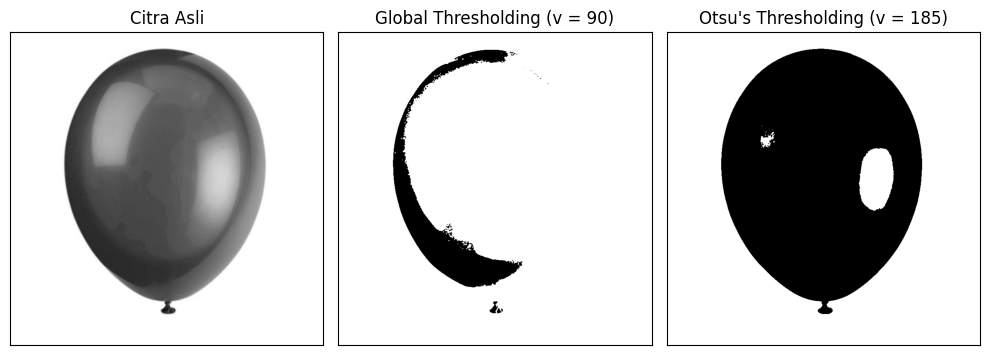

In [8]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/balloon.jpg', 0)

# Mengaburkan gambar menggunakan GaussianBlur
def manual_gaussian_blur(image, kernel_size=(5,5), sigma=0):
    kernel_x = cv.getGaussianKernel(kernel_size[0], sigma)
    kernel_y = cv.getGaussianKernel(kernel_size[1], sigma)
    kernel = kernel_x * kernel_y.T
    return cv.filter2D(image, -1, kernel)

# Global Thresholding Manual
def manual_threshold(image, thresh):
    result = np.zeros_like(image)
    result[image > thresh] = 255
    return result

# Otsu Thresholding Manual
def otsu_threshold(image):
    # Histogram
    hist, bins = np.histogram(image.flatten(), 256, [0,256])

    # Total number of pixels
    total = image.shape[0] * image.shape[1]

    current_max, threshold = 0, 0
    sumT, sumF, sumB = 0, 0, 0
    weightB, weightF = 0, 0

    for i in range(0, 256):
        sumT += i * hist[i]

    for i in range(0, 256):
        weightB += hist[i]   # Weight Background
        if weightB == 0:
            continue

        weightF = total - weightB   # Weight Foreground
        if weightF == 0:
            break

        sumB += i * hist[i]
        meanB = sumB / weightB      # Mean Background
        meanF = (sumT - sumB) / weightF  # Mean Foreground

        # Between Class Variance
        varBetween = weightB * weightF * (meanB - meanF) ** 2

        # Check if new maximum found
        if varBetween > current_max:
            current_max = varBetween
            threshold = i

    # Apply threshold
    result = manual_threshold(image, threshold)
    return result, threshold

# Gaussian blur manual
blur = manual_gaussian_blur(img, (5, 5), 0)

# Global thresholding manual
thresh = 90
th1 = manual_threshold(blur, thresh)

# Otsu's thresholding manual
th2, ret2 = otsu_threshold(blur)

# Teks untuk Otsu's thresholding
x = "Otsu's Thresholding (v = " + str(ret2) + ")"

# Menampilkan hasil
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(10, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### **5.	Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.**

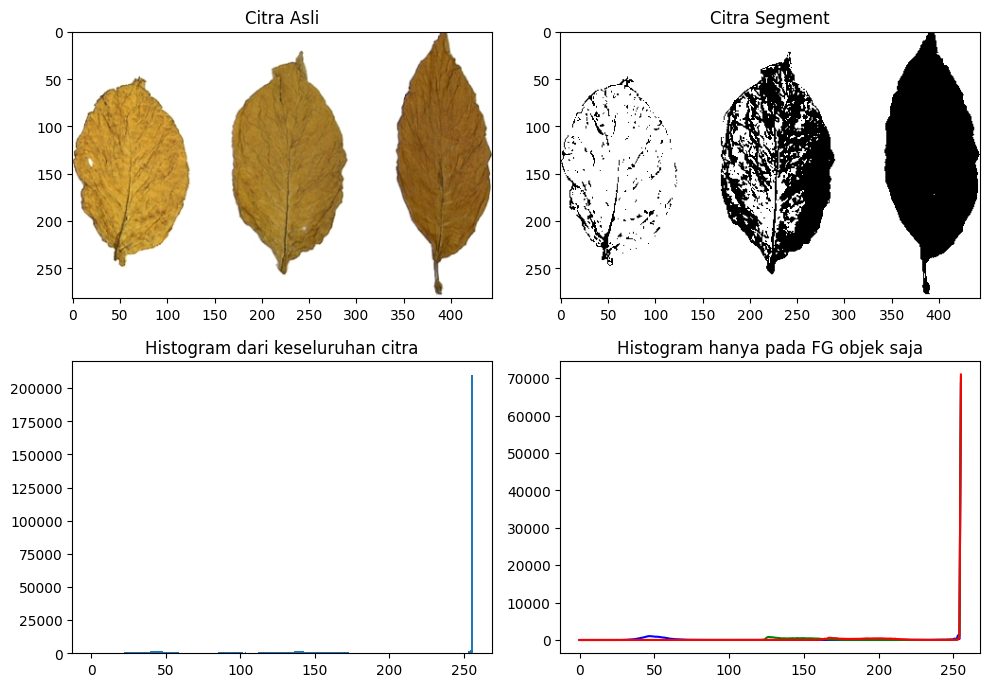

In [15]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/tobacco.jpg') # Remove the flag '0' to load in color


# Convert the image to grayscale for segmentation (if needed, but likely redundant now)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply binary thresholding to segment the leaves (foreground)
_, mask = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)

# Calculate histogram for each channel (B, G, R) on the original image
# Mask will be applied to only compute histogram for the foreground
hist_b = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_r = cv.calcHist([img], [2], mask, [256], [0, 256])

# Plot the original image and the segmented image
plt.figure(figsize=(10, 7))

# Show the original image
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Show the segmented (mask) image
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')

# Plot histogram for the entire image (without mask)
plt.subplot(2, 2, 3)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram dari keseluruhan citra')

# Plot histogram only for the foreground (using the mask)
plt.subplot(2, 2, 4)
plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.title('Histogram hanya pada FG objek saja')

plt.tight_layout()
plt.show()

### **6.	Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)**

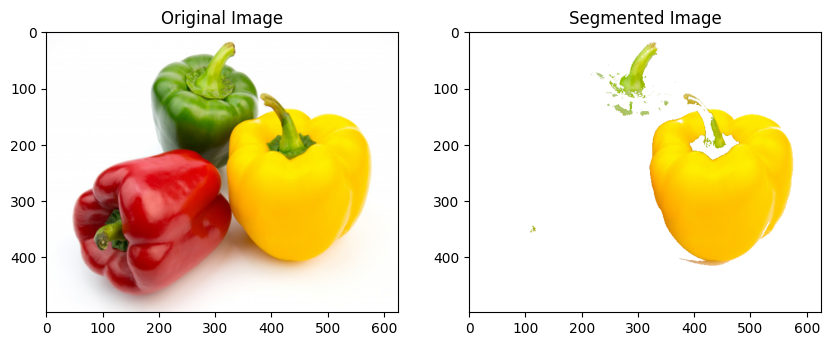

In [21]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/peppers.jpg')

# Reshape the image into a 2D array of pixels
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria for KMeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert the centers back to uint8
centers = np.uint8(centers)

# Get the segmented image
segmented_image = centers[labels.flatten()]

# Reshape it back to the original image
segmented_image = segmented_image.reshape(img.shape)

# Kamu dapat menyesuaikan batas bawah dan atas sesuai dengan citra kamu
lower_yellow = np.array([0, 180, 180])  # Batas bawah warna kuning (BGR)
upper_yellow = np.array([50, 255, 255])  # Batas atas warna kuning (BGR)

# Masking: pilih hanya area yang sesuai dengan warna kuning
mask = cv.inRange(segmented_image, lower_yellow, upper_yellow)
result = cv.bitwise_and(img, img, mask=mask)

# Membuat bagian yang bukan warna kuning menjadi putih
result = img.copy()
result[mask == 0] = [255]

# Display the original and segmented images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

**Jawab :**

*   Kesulitan dalam Pemilihan Cluster Warna Kuning: K-Means bekerja dengan cara mengelompokkan warna berdasarkan jarak di ruang warna RGB. Namun, warna kuning dalam gambar mungkin tidak selalu eksklusif atau murni dalam ruang warna tersebut. Terkadang, warna yang mirip dengan kuning seperti hijau kekuningan atau oranye kekuningan bisa masuk dalam cluster yang sama. Ini membuat hasil segmentasi kurang akurat karena piksel yang seharusnya tidak kuning juga terpilih.
*   Perbedaan Pencahayaan: Gambar mungkin memiliki variasi pencahayaan yang memengaruhi persepsi warna. Bagian yang seharusnya kuning bisa terlihat lebih terang atau lebih gelap, sehingga sulit bagi algoritma K-Means untuk mendeteksi kuning dengan tepat.
*   Pengelompokan Warna yang Tidak Selalu Konsisten: Warna kuning di dalam citra tidak selalu mendominasi, dan sering kali jumlah cluster yang dibentuk oleh K-Means tidak sepenuhnya memetakan warna kuning sebagai satu cluster terpisah. Cluster yang dihasilkan juga bisa memetakan warna lain yang mirip kuning ke dalam satu cluster.






### **7.	Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.**

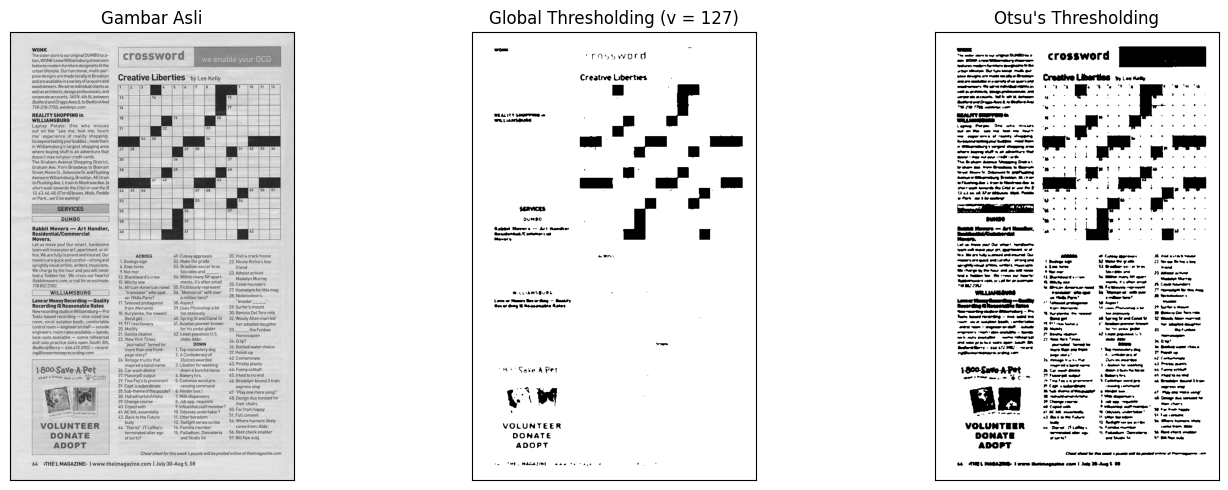

Nilai threshold yang dipilih oleh Otsu's Method: 171.0


In [23]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the crossword image
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/crossword.jpg', 0)

# Gaussian blur untuk mengurangi noise
blur = cv.GaussianBlur(img, (5, 5), 0)

# Global Thresholding
thresh_value = 127  # Threshold global ditentukan secara manual
ret1, th1 = cv.threshold(blur, thresh_value, 255, cv.THRESH_BINARY)

# Otsu's Thresholding (tanpa menentukan threshold manual)
ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Menampilkan hasil
titles = ['Gambar Asli', 'Global Thresholding (v = 127)', "Otsu's Thresholding"]
images = [img, th1, th2]

plt.figure(figsize=(15,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Mencetak nilai threshold Otsu yang dipilih secara otomatis
print(f"Nilai threshold yang dipilih oleh Otsu's Method: {ret2}")
